# H254-MFCI-03

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import cumulative_trapezoid

In [2]:
EXPID = 'H254-MFCI-03'
EXPTYPE = 'ifci'
DATE = '2017-06-27'

## Load Data

Fix for slightly 'broken' logger timeline

In [3]:
SRATE = 1.0e5
DURATION = 5.0
index = np.arange(DURATION * SRATE) / SRATE

In [4]:
data = pd.read_csv(
    '../../data/sensors/2017-07-25_H254-MFCI-03.txt', skiprows=2, sep='\t',
    names=['trig', 'force', 'mic', 'seis', 'press', 'el',], index_col=0
)
data.index = index
data.index.name = 't'
data.force *= 1e3
data.press *= 1e6
data.head()

trig    force       mic      seis    press        el
t                                                                
0.00000  0.448843 -8.82715 -0.003674 -0.002064 -6572.61  0.808280
0.00001  0.064928 -8.50507  0.009209 -0.002708 -6572.61  0.807958
0.00002  0.130632 -8.82715  0.004700  0.001479 -6572.61  0.807636
0.00003  0.186029 -9.14922 -0.008827  0.002446 -6572.61  0.807314
0.00004  0.236595 -8.50507 -0.005928 -0.004640 -6250.54  0.807636

## Show Raw Data

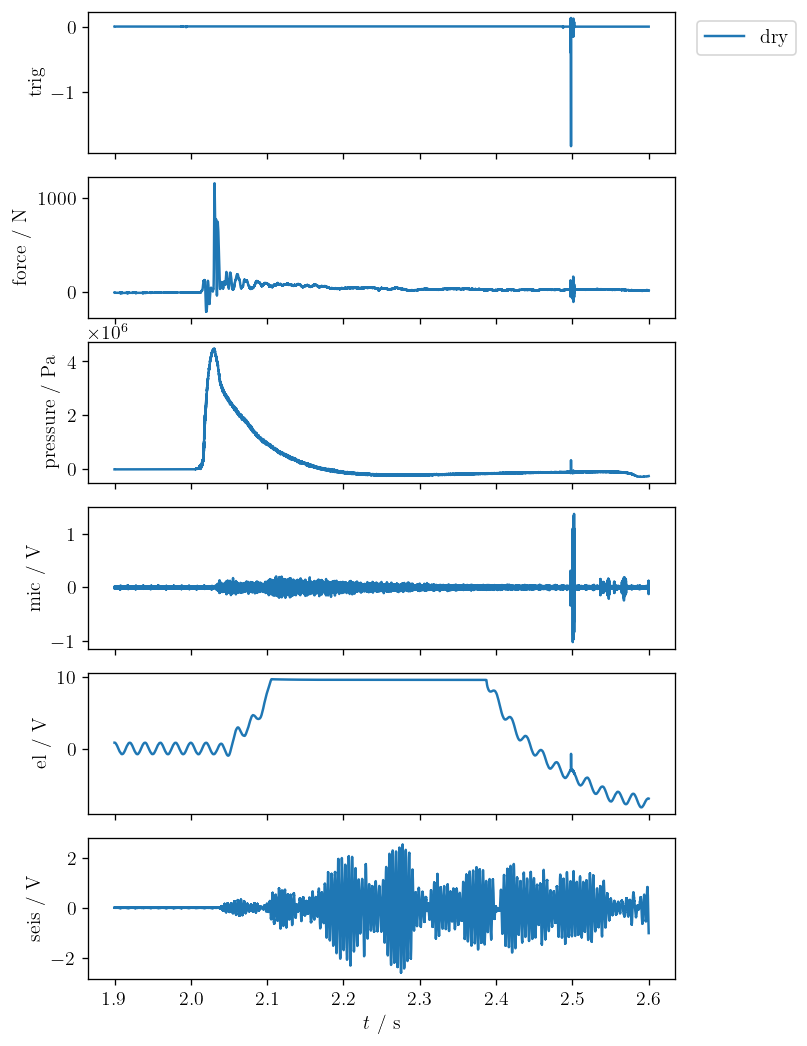

In [5]:
fig, axs = plt.subplots(nrows=6, sharex=True)

for ax, col in zip(axs, ['trig', 'force', 'press', 'mic', 'el', 'seis']):
    ax.plot(data.loc[1.9:2.6, col], label='dry')
axs[0].legend(loc='upper left', bbox_to_anchor=(1.02, 1))
axs[-1].set(xlabel=r'$t\ /\ \mathrm{s}$')
for ax, lbl in zip(axs, ['trig', 'force / N', 'pressure / Pa', 'mic / V',
                         'el / V', 'seis / V']):
    ax.set_ylabel(lbl)
fig.set_size_inches(7, 9)
fig.tight_layout(pad=1, h_pad=0.)

- Electric signal is saturated

In [6]:
ttrig = 1.9877432
tspike = 2.4975690
tend = 2.4

## Summary Entries

In [7]:
fmax, fmin = data.loc[ttrig:tend].force.max(), data.loc[ttrig:tend].force.min()
fmax, fmin

(1157.73354, -210.44682)

### Summary

In [8]:
summ = pd.read_csv('../../data/summary.csv', index_col=0)
summ.loc[EXPID, 'exptype'] = EXPTYPE
summ.loc[EXPID, ['ttrig', 'tspike']] = [ttrig, tspike]
summ.loc[EXPID, ['Fmin', 'Fmax']] = fmin, fmax
summ.loc[EXPID, 'pmax'] = data.press.max()
summ

exptype     ttrig    tspike        Fmax       Fmin        pmax
expid                                                                      
H254-dry-01      dry  1.987832  2.497630   762.86770 -300.95020  3695707.00
H254-MFCI-03    ifci  1.987743  2.497569  1157.73354 -210.44682  4479971.31
billstein01     mfci  0.317654  0.579460   286.26030  -39.35883         NaN
billstein02     mfci  0.317585  0.579495   679.03260  -86.86507         NaN
billstein03     mfci  0.317615  0.579465   177.55950  -37.42638         NaN
billstein04     mfci  0.317574  0.579375  1996.81500 -122.13240         NaN

### asdf

In [9]:
import asdf

In [10]:
tree = {
    'id': EXPID,
    'date': DATE,
    'srate': SRATE,
    'summ': dict(summ.loc[EXPID]),
    'fields': ['t'] + list(data.columns),
    'units': ['s', 'V', 'N', 'Pa', 'V', 'V', 'V'],
    'time': {'ttrig': ttrig, 'tspike': tspike, 't': data.index.values},
}
for col in data.columns:
    tree[col] = data[col].values
af = asdf.AsdfFile(tree)